<a href="https://colab.research.google.com/github/damianlukawski/Junior-Data-Science-Software-Engineer/blob/master/Analysing_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Full analysis of titanic dataset by pandas and matplotlib 

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [ ]:
dftrain=  pd.read_csv(r'/content/drive/My Drive/Colab Data/train.csv', delimiter=';')

In [ ]:
dftrain.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
1,2,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
2,3,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
3,4,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
4,5,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
5,6,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
6,7,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
7,8,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
8,9,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
9,10,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [ ]:
dftrain[dftrain.Cabin.notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
7,8,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
8,9,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
13,14,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
21,22,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
...,...,...,...,...,...,...,...,...,...,...,...,...
782,783,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
783,784,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
790,791,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
798,799,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Clearly Cabin is null in most cases so it should be dropped

In [ ]:
dftrain=dftrain.drop(['Cabin'], axis=1)

I believe name and surname are irrelevant for the model.
The titles (Mr. vs Ms., etc.) may be relevant so it should be extracted from the model. 
Ticket also is irrelevant as it is not clear what ticket no. mean.

In [ ]:
dftrain['Title']=dftrain['Name'].str.split(' ', n=2, expand=True)[1]
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,S,Mr.
1,2,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,S,Mr.
2,3,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,S,Mr.
3,4,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,S,Mr.
4,5,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,S,Mr.


In [ ]:
dftrain=dftrain.drop([('Ticket'), ('Name')], axis=1)

In [ ]:
dftrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,24.0,0,0,8.0500,S,Mr.
1,2,0,3,male,29.0,0,0,8.0500,S,Mr.
2,3,0,3,male,20.0,0,0,7.8542,S,Mr.
3,4,0,1,male,46.0,1,0,61.1750,S,Mr.
4,5,0,3,male,26.0,1,2,20.5750,S,Mr.


Check any clear dependences between surviving probability and other parameters (Class, Sex, Age, SibSp, Parch, Fare, Title)

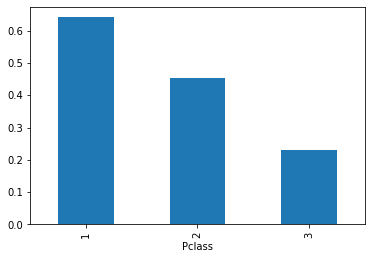

In [ ]:
dftrain.groupby('Pclass').Survived.mean().plot(kind='bar')

Clearly, the worse class the least probable was to survive

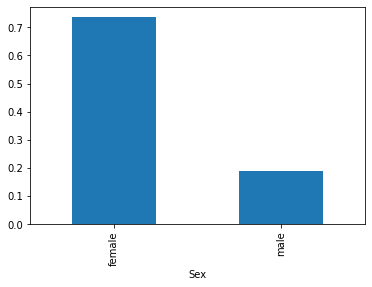

In [ ]:
dftrain.groupby('Sex').Survived.mean().plot(kind='bar')

It is much more possible for women to survive

In [ ]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,802.000000,802.000000,802.000000,646.000000,802.000000,802.000000,802.000000
mean,401.500000,0.377805,2.296758,30.075604,0.493766,0.374065,32.431675
std,231.661751,0.485141,0.838651,14.470148,1.084719,0.781960,50.414965
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,201.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,401.500000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,601.750000,1.000000,3.000000,39.000000,1.000000,0.000000,30.923950
max,802.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


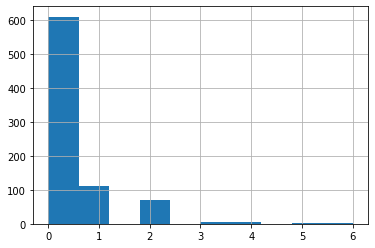

In [ ]:
dftrain.Parch.hist()

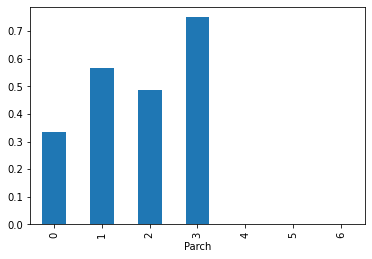

In [ ]:
dftrain.groupby('Parch').Survived.mean().plot(kind='bar')

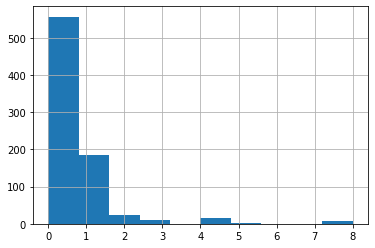

In [ ]:
dftrain.SibSp.hist()

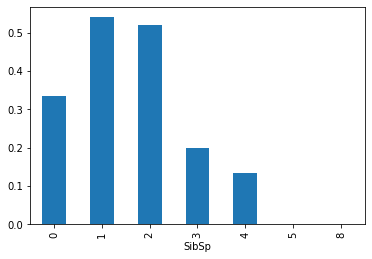

In [ ]:
dftrain.groupby('SibSp').Survived.mean().plot(kind='bar')

I do not see any significant correlations between surviving probablility and SibSp or Parch, I will consider dropping this data in the future

(0.0, 100.0)

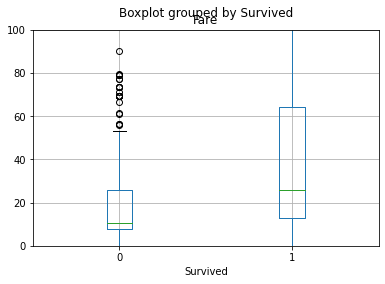

In [ ]:
dftrain.boxplot(column='Fare', by='Survived')
plt.ylim((0,100))

#dftrain.Fare.plot(kind='box',by='Survived')#Survived.plot('Fare', kind='box', by='Survived')

(100.0, 600.0)

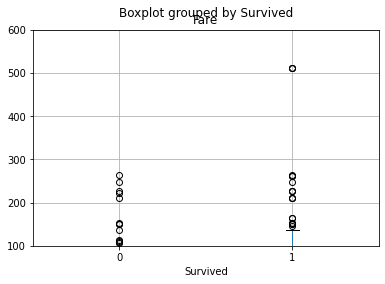

In [ ]:
dftrain.boxplot(column='Fare', by='Survived')
plt.ylim((100,600))

there may be a correlation that if you have more expensive ticket you may survive

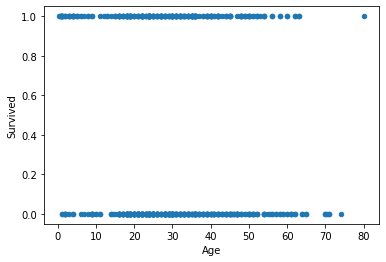

In [ ]:
dftrain.plot('Age', 'Survived', kind='scatter')

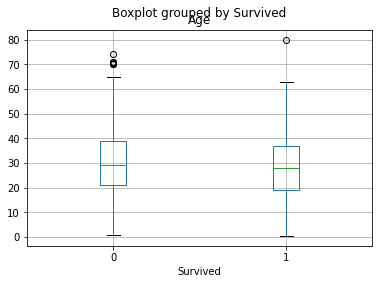

In [ ]:
dftrain.boxplot(column='Age', by='Survived')

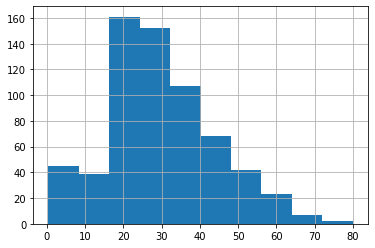

In [ ]:
dftrain.Age.hist()

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

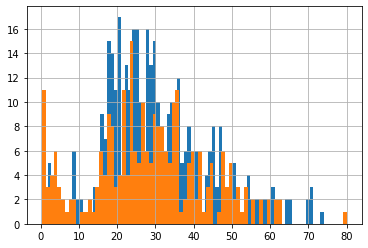

In [ ]:
dftrain.groupby('Survived').Age.hist(bins=80)

It is more possible to survive as a child

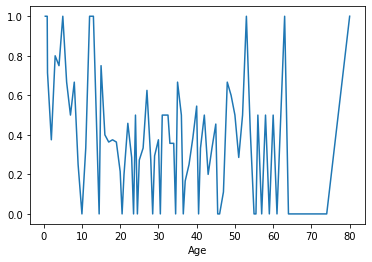

In [ ]:
dftrain.groupby('Age').Survived.mean().plot()

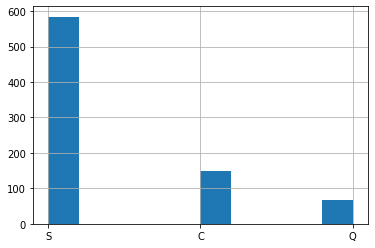

In [ ]:
dftrain.Embarked.hist()



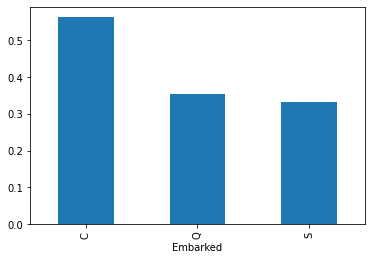

In [ ]:
dftrain.groupby('Embarked').Survived.mean().plot(kind='bar')

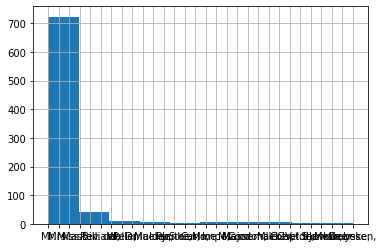

In [ ]:
#dftrain.groupby('Title').Survived.mean().plot(kind='bar')
dftrain.Title.hist()

In [ ]:
dftrain=dftrain.drop(['Title'], axis=1)


In [ ]:
dftrain2=  pd.read_csv(r'/content/drive/My Drive/Colab Data/train.csv', delimiter=';')



In [ ]:
dftrain2['Title'] = dftrain2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [2]:
print('\.')

/.


In [ ]:
dftrain2.Title.iloc[0:100]

0       Mr
1       Mr
2       Mr
3       Mr
4       Mr
      ... 
95    Miss
96      Mr
97     Mrs
98      Mr
99      Mr
Name: Title, Length: 100, dtype: object

In [ ]:
dftrain2.Title.value_counts()

Mr          474
Miss        160
Mrs         109
Master       33
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Jonkheer      1
Lady          1
Capt          1
Countess      1
Ms            1
Mme           1
Name: Title, dtype: int64